In [6]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
from cv2 import cv2
from matplotlib import pyplot as plt
from numpy import random

# print("Reading Dataframe")
# info = pd.read_csv("data/dataset_raw/MIAS/Info.txt", sep=" ")
# info = info.drop('Unnamed: 7', axis=1)
# info.head()

In [7]:
label = []
path_base = "E:\\U\\Improvement-Mammograms-to-Breast-Cancer-Detection\\data\\"
type_data = "dataset_roi/"
dataset = "MIAS/"
folder_find_images = "ClassBMN/"
path_to_read = path_base+type_data +dataset +folder_find_images
import os
folder_of_clases = os.listdir(path_to_read)

# print(folder_of_clases)
# store Labels
for folder in folder_of_clases:
    amount_imgs = len(os.listdir(path_to_read+folder+"/"))
    temp_list = []
    if folder == "benigno":
         temp_list = [0] * amount_imgs
        #         label.append(0)
    elif folder == "maligno":
        temp_list = [1] * amount_imgs
#         label.append(1)
    else: # normal
        temp_list = [2] * amount_imgs
    label += temp_list

#         label.append(2)
label = np.array(label)
unique, counts = np.unique(label, return_counts=True)
print(np.asarray((unique, counts)).T)

# print(f"Cantidad de Imagenes: {len(label)}, Normales = {len(label) - np.sum(label)}, No normales= {np.sum(label)}")
# print("Len de Label:", len(label))
# E:\U\Improvement-Mammograms-to-Breast-Cancer-Detection\data\dataset_preprocessing\MIAS

[[  0  63]
 [  1  52]
 [  2 207]]


In [8]:
import numpy as np
print(np.where(label == 0))
print(np.where(label == 1))
print(np.where(label == 2))
# https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# https://stackoverflow.com/questions/10741346/frequency-counts-for-unique-values-in-a-numpy-array
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding
import tensorflow as tf
layer = tf.keras.layers.CategoryEncoding( num_tokens=3, output_mode="one_hot")
new_label = layer(label)
print(new_label[:5])
print(new_label[0])
print(new_label[63])
print(new_label[115])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int64),)
(array([ 63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114],
      dtype=int64),)
(array([115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184,

In [9]:
def paths_names_files():
    folder_of_clases = os.listdir(path_to_read)
    folder_name_file_b = []
    folder_name_file_m = []
    folder_name_file_n = []
    #     print("Carpetas:",folder_of_clases)
    # store Labels
    for folder in folder_of_clases:
#         print(folder)
        imgs = os.listdir(path_to_read + folder + "/")
        #         print("Lens ",len(imgs))
        if folder == "benigno":
            folder_name_file_b = list(map(lambda i: folder + "/" + i, imgs))
        elif folder == "maligno":
            folder_name_file_m = list(map(lambda i: folder + "/" + i, imgs))
        else:
            folder_name_file_n = list(map(lambda i: folder + "/" + i, imgs))
    #     print(len(folder_name_file_b))
    #     print(len(folder_name_file_m))
    #     print(len(folder_name_file_n))
    return folder_name_file_b, folder_name_file_m, folder_name_file_n


# paths_names_files()

In [10]:
def balanced_class():
    label = []
    temp_img_name = []
    folder_name_file_b, folder_name_file_m, folder_name_file_n = paths_names_files()
    #     print(folder_name_file_b[0])
    #     print(folder_name_file_m[0])
    #     print(folder_name_file_n[0])

    amount_delete_to_balanced_b = 0
    amount_delete_to_balanced_m = 0
    amount_delete_to_balanced_n = 100
    for folder in folder_of_clases:
        amount_imgs = len(os.listdir(path_to_read + folder + "/"))
        temp_list = []
        if folder == "benigno":
            amount_keep_b = amount_imgs - amount_delete_to_balanced_b
#             print(amount_keep_b)
            temp_list = [0] * amount_keep_b
            #             
            folder_name_file_b = folder_name_file_b[:(amount_keep_b)]
            print("Len B:",len(folder_name_file_b))
        #             print(folder_name_file_b)
        elif folder == "maligno":
            amount_keep_m = amount_imgs - amount_delete_to_balanced_m
            temp_list = [1] * (amount_keep_m)
            #             
            folder_name_file_m = folder_name_file_m[:(amount_keep_m)]
            print("Len M:",len(folder_name_file_m))

        else:  # normal
            amount_keep_n = amount_imgs - amount_delete_to_balanced_n
            temp_list = [2] * amount_keep_n
            #             
            folder_name_file_n = folder_name_file_n[:(amount_keep_n)]
            print("Len N:",len(folder_name_file_n))
        label += temp_list
    temp_img_name = folder_name_file_b + folder_name_file_m + folder_name_file_n
#     print(len(label))
#     print(len(temp_img_name))
    return label, temp_img_name


# balanced_class()
# print("Ga?")
new_label,img_name = balanced_class()
new_label = np.array(new_label)
unique, counts = np.unique(new_label, return_counts=True)
img_name = np.array(img_name)
print(np.asarray((unique, counts)).T)
print(len(img_name))
# print(img_name[0])

Len B: 63
Len M: 52
Len N: 107
[[  0  63]
 [  1  52]
 [  2 107]]
222


In [11]:
print("Len Label:", len(new_label))
print("Shape de img_name", img_name.shape)

Len Label: 222
Shape de img_name (222,)


In [12]:
new_label.dtype

dtype('int32')

In [13]:
import tensorflow as tf
ind_b =np.where(new_label == 0)[0]
ind_m =np.where(new_label == 1)[0]
ind_n =np.where(new_label == 2)[0]
layer = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="one_hot")
new_label = layer(new_label)


In [14]:
print(new_label[ind_b[0]])
print(new_label[ind_m[0]])
print(new_label[ind_n[0]])

tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)


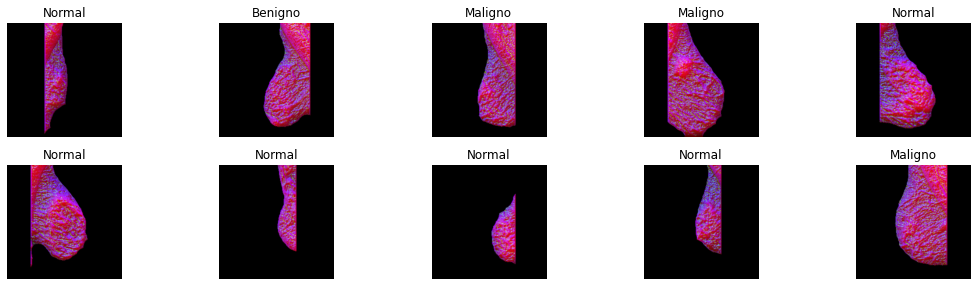

In [15]:
# view image random images
from cv2 import cv2
from matplotlib import pyplot as plt
from numpy import random
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(10):
        rand = random.randint(0,len(new_label))
        ax = plt.subplot(5, 5, i+1)
    
#         print(path_to_read+img_name[rand])
#         break
        # ----------------------------Escala a grises----------------------------         
#         img = cv2.imread(path_to_read+img_name[rand], 0)
        # ----------------------------Imagen tif----------------------------
        img = cv2.imread(path_to_read+img_name[rand])
#         print(img.shape)
        img = cv2.resize(img, (256,256))
        if list(new_label[rand]) == [1. ,0., 0.]:
            plt.title('Benigno')
        elif list(new_label[rand]) == [0. ,1., 0.]:
            plt.title('Maligno')
        else:
            plt.title('Normal')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
#     fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [16]:
# Aumentación de datos
img_path = []
last_label = []
IMG_SIZE = 128

for name_img, label_img in zip(img_name, new_label):
    # ----------------------------Escala a grises----------------------------
    # img = cv2.imread(path_to_read+name_img[rand], 0)
    # ----------------------------Imagen tif----------------------------
    img = cv2.imread(path_to_read + name_img)

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#     print(img.shape)
#     break
#     print(img)
#     print(img.shape)
#     break
    rows, cols, c = img.shape
    
    for angle in range(180):
        M = cv2.getRotationMatrix2D(
            (cols / 2, rows / 2), angle * 2, 1
        )  
        img_rotated = cv2.warpAffine(img, M, (IMG_SIZE, IMG_SIZE))
        img_path.append(img_rotated)
        last_label.append(label_img)


print("Cantidad de labels", len(last_label))
print("Cantidad de img path", len(img_path))
img_path = np.array(img_path)
last_label = np.array(last_label)
print("Shape:", img_path.shape)
img_path = img_path.reshape((-1, IMG_SIZE, IMG_SIZE, 3))
print("Nuevo Shape:", img_path.shape)

Cantidad de labels 39960
Cantidad de img path 39960
Shape: (39960, 128, 128, 3)
Nuevo Shape: (39960, 128, 128, 3)


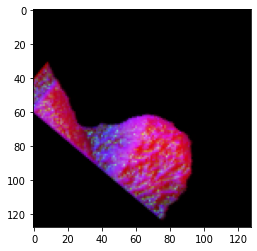

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Comprombar que los 3 canales este rotantdo
plt.imshow(img_path[25])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)
print(len(x_train),len(x_test),len(y_train),len(y_test))

31968 7992 31968 7992


In [28]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.activations import *
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from time import time
import tensorflow as tf

reg = tf.keras.regularizers.L2(l2=1e-5)
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)


model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3)))
# input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Conv2D(64,
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(64,
                kernel_initializer = ini,
                activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3)

from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
list_metric = [Precision(name="precision"), Recall(name="recall"),CategoricalAccuracy()]

model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics=list_metric)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 30, 30, 64)       

In [29]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=3, restore_best_weights=True, verbose=1
)
# early_stop = EarlyStopping(monitor='val_categorical_accuracy', mode='min', patience=3,restore_best_weights=True, verbose=1)

check_point_filepath = "temp/"

model_check_point = ModelCheckpoint(
    filepath=check_point_filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)
# model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

In [30]:
train = True
if train:
    epochs=100
    history = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=epochs,
                 batch_size=128,
                 callbacks=[early_stop, model_check_point])
else:
    model = tf.keras.models.load_model('temp/')

Epoch 1/100
200/200 [==============================] - 27s 102ms/step - loss: 1.0322 - precision: 0.5685 - recall: 0.2232 - categorical_accuracy: 0.4851 - val_loss: 1.0216 - val_precision: 0.5592 - val_recall: 0.3322 - val_categorical_accuracy: 0.4912

Epoch 00001: val_loss improved from inf to 1.02155, saving model to temp\
INFO:tensorflow:Assets written to: temp\assets
Epoch 2/100
200/200 [==============================] - 18s 88ms/step - loss: 1.0078 - precision: 0.5967 - recall: 0.2762 - categorical_accuracy: 0.5003 - val_loss: 1.0035 - val_precision: 0.5622 - val_recall: 0.3843 - val_categorical_accuracy: 0.5069

Epoch 00002: val_loss improved from 1.02155 to 1.00352, saving model to temp\
INFO:tensorflow:Assets written to: temp\assets
Epoch 3/100
200/200 [==============================] - 18s 87ms/step - loss: 0.9782 - precision: 0.6145 - recall: 0.3095 - categorical_accuracy: 0.5257 - val_loss: 0.9596 - val_precision: 0.6391 - val_recall: 0.3284 - val_categorical_accuracy: 0.540

In [31]:
from src.utils.utils import Save_model_summary_txt_architecture_json

Save_model_summary_txt_architecture_json(model)

Summary en txt creado
Arquitectura en json creado


In [33]:
if True:
    tf.keras.models.save_model(model, "temp/model/")

INFO:tensorflow:Assets written to: temp/model/assets


In [35]:

import mlflow
from mlflow.entities import Metric
from mlflow.tracking import MlflowClient
from src.parameters.model_parameters import *
from src.utils.utils import *
mlflow_client = MlflowClient()
EXPERIMENT_NAME = "MIAS_ClasBMN"
try:
    EXPERIMENT_ID = mlflow.create_experiment(EXPERIMENT_NAME)
except:
    EXPERIMENT_ID = mlflow_client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
name_red = "new_CNN_3_canales"
transfer_learning = True
batch_size=128
learning_rate = 1e-3
loss = "Adam"
dataset = "Mias"
mode_classification = "ClassBMN"
validation_split = "0.2"
type_dataset_train = "Brint"
with mlflow.start_run(experiment_id=EXPERIMENT_ID, run_name=name_red) as active_run:
    # with mlflow.start_run(run_name=name_red) as active_run:
    # mlflow_client = MlflowClient()
    # experiment_id = mlflow_client.create_experiment("Mamografías CNNs experimentos")
    # experiment_id = "0"
    # run = mlflow_client.create_run(experiment_id)
    all_metrics = []
    f1, val_f1 = get_F1_scores(history)
    for metric_name in history.history:
        for i in history.epoch:
            metric = Metric(
                key=metric_name,
                value=history.history[metric_name][i],
                timestamp=0,
                step=i,
            )
            all_metrics.append(metric)
    all_metrics = all_metrics + f1 + val_f1

    mlflow_client.log_batch(run_id=active_run.info.run_id, metrics=all_metrics)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="batch size", value=batch_size)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="learning rate", value=learning_rate)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="epochs", value=epochs)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="optimizer", value=optimizer.__class__.__name__)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Loss", value=loss)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="DB", value=dataset)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Type data", value=type_dataset_train)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Transfer Learning", value=transfer_learning)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="ModoClass", value=mode_classification)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Split test", value=validation_split)
    mlflow.log_artifact("temp/", artifact_path="arquitectura")
    # if config.LOG_JSON_TXT_MODEL_MLFlow:
    #     mlflow.log_artifact("temp/summary_model.txt", artifact_path="arquitectura")
    #     mlflow.log_artifact("temp/architecture.json", artifact_path="arquitectura")
    # if config.LOG_MODEL_MLFlow:
    #     mlflow_client.log_artifacts(run_id=active_run.info.run_id, local_dir="temp/model/")

    mlflow_client.log_batch(run_id=active_run.info.run_id, metrics=all_metrics)
    print("Todas las metricas guardadas")

Todas las metricas guardadas


# Cargar el Modelo

In [ ]:
import tensorflow as tf

model_cnn_3_train = tf.keras.models.load_model(
    "mlruns/3/cd3bf06a9b334948bb8d631676482929/artifacts/arquitectura/temp/model/"
)

In [5]:
model_cnn_3_train.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 30, 30, 64)       

The results was: [0.00153364 0.0186251  0.97984123]    Real value was: [0. 0. 1.]


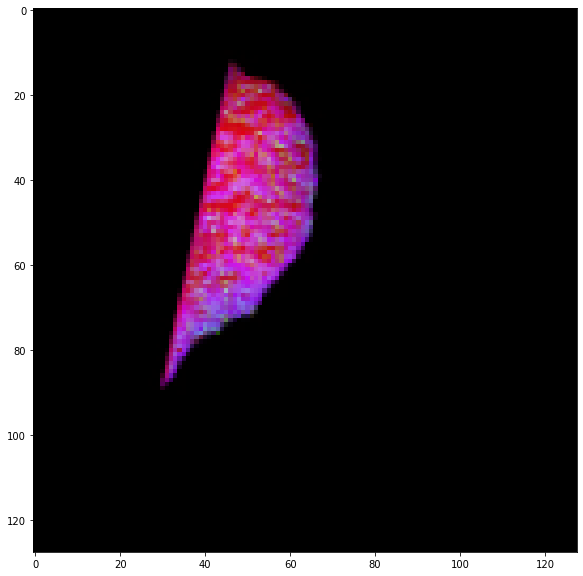

In [21]:
from random import randint
test_num = randint(0,len(x_test))
#test_num = 274
result = model_cnn_3_train.predict(np.array([x_test[test_num]]))

plt.figure(figsize= (10,10))
plt.imshow(x_test[test_num])

print(f"The results was: {result[0]}    Real value was: {y_test[test_num]}")
# print(f"Test id: {test_num}")

In [54]:
x_test.shape

(6588, 128, 128, 1)

In [55]:
y_test.shape

(6588, 3)

In [23]:
# print(model.evaluate(x_test,  y_test, verbose=2))

test_loss,test_precsision, test_recall,test_acc,  = model_cnn_3_train.evaluate(x_test,  y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\ntest_precsision :',test_precsision )
print('\ntest_recall :',test_recall )
print('\nTtest_acc :', test_acc)

250/250 - 4s - loss: 0.1156 - precision: 0.9691 - recall: 0.9643 - categorical_accuracy: 0.9673

Test loss: 0.11559372395277023

test_precsision : 0.9690682888031006

test_recall : 0.9643393158912659

Ttest_acc : 0.9673423171043396


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                        para_precision= None,
                        para_recall =  None,
                        para_f1_score = None
                         ):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
#             para_precision para_recall,para_f1_score
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,para_precision,para_recall,para_f1_score)
            
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    heatmap = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
#     fig = heatmap.get_figure()
#     fig.savefig("heatmap.png") 
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

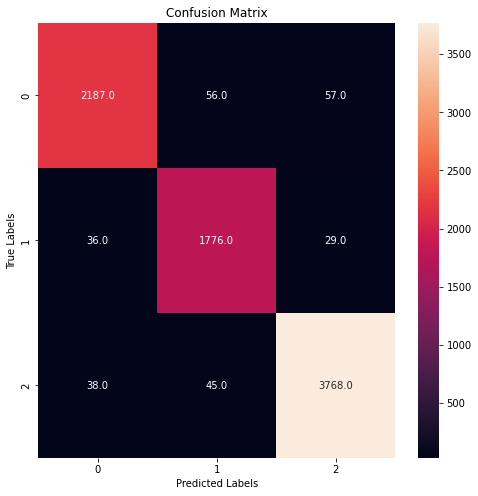

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicting labels from X_test data
y_pred = model_cnn_3_train.predict(x_test)
# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)
# Create the confusion matrix
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

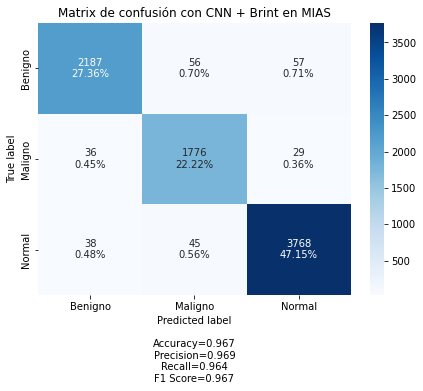

In [28]:
categories = ["Benigno", "Maligno", "Normal"]
test_f1_score = (2 * test_precsision * test_recall) / (test_precsision + test_recall)
make_confusion_matrix(
    confmx,
    figsize=(7, 5),
    categories=categories,
    title="Matrix de confusión con CNN + Brint en MIAS",
    para_precision=test_precsision,
    para_recall=test_recall,
    para_f1_score=test_f1_score,
    cmap='Blues'
)